# 数据操作

为了能够完成各种操作，我们需要某种方法来存储和操作数据。一般来说，我们需要做两件重要的事情：（1）获取数据；（2）在数据读入计算机后对其进行处理。如果没有某种方法来存储数据，那么获取数据是没有意义的。我们先尝试一个合成数据。首先，我们介绍$n$维数组，也称为 *张量*（tensor）。


## 生成tensor

首先，我们导入 `tensorflow`。由于名称有点长，我们经常使用短别名 `tf` 导入它。


In [3]:
import tensorflow as tf

[**张量表示一个数值组成的数组，这个数组可能有多个维度**]。具有一个轴的张量对应于数学上的 *向量*（vector）。具有两个轴的张量对应于数学上的 *矩阵*（matrix）。具有两个轴以上的张量没有特殊的数学名称。

首先，我们可以使用 `arange` 创建一个行向量 `x`。这个行向量包含以0开始的前12个整数，它们默认创建为浮点数。张量中的每个值都称为张量的 *元素*（element）。例如，张量 `x` 中有 12 个元素。除非额外指定，新的张量将存储在内存中，并采用基于CPU的计算。


In [ ]:
x = tf.range(12)
x

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>

**通过张量的 `shape` 属性来访问张量的 *形状***


In [ ]:
x.shape

TensorShape([12])

如果我们只想知道张量中元素的总数，即形状的所有元素乘积，我们可以检查它的大小（size）。
因为这里在处理的是一个向量，所以它的 `shape` 与它的 `size` 相同。


In [ ]:
tf.size(x)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

[**要改变一个张量的形状而不改变元素数量和元素值，我们可以调用 `reshape` 函数。**]
例如，我们可以把张量 `x` 从形状为 (12, ) 的行向量转换为形状 (3, 4) 的矩阵。这个新的张量包含与转换前相同的值，但是把它们看成一个三行四列的矩阵。要重点说明一下，虽然形状发生了改变，但元素值没有变。注意，通过改变张量的形状，张量的大小不会改变。


In [ ]:
X = tf.reshape(x, (3, 4))
X

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

不需要通过手动指定每个维度来改变形状。
如果我们的目标形状是 (高度, 宽度) ，那么在知道宽度后，高度应当会隐式得出，我们不必自己做除法。在上面的例子中，要获得一个有3行的矩阵，我们手动指定了它有3行和4列。幸**运的是，张量在给出其他部分后可以自动计算出一个维度。我们可以通过将希望张量自动推断的维度放置 `-1` 来调用此功能。**在上面的例子中，我们可以用 `x.reshape(-1, 4)` 或 `x.reshape(3, -1)`来取代`x.reshape(3, 4)`。


有时，我们希望[**使用全0、全1、其他常量或者从特定分布中随机采样的数字**]，来初始化矩阵。我们可以创建一个形状为 (2, 3, 4) 的张量，其中所有元素都设置为0。代码如下：


In [ ]:
tf.zeros((2, 3, 4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)>

同样的，我们可以创建一个张量，其中所有元素都设置为1。代码如下：


In [ ]:
tf.ones((2, 3, 4))

<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)>

创建一个形状为 (3, 4) 的张量。其中的每个元素都从均值为0、标准差为1的标准高斯（正态）分布中随机采样。


In [ ]:
tf.random.normal(shape=[3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.06066323, -0.2710563 ,  0.09940508, -0.48237324],
       [-0.28749883, -0.08045979,  0.17377815, -1.6697613 ],
       [ 2.6813815 ,  0.7925951 , -0.99550605,  0.6647856 ]],
      dtype=float32)>

In [4]:
tf.random.normal(shape=(3,4))  # 似乎和上面没有区别

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 0.88779145, -0.7829903 ,  0.40905505,  0.8639114 ],
       [ 2.0798135 , -0.73407716, -0.8396039 , -1.2732086 ],
       [ 2.2429762 , -0.46559012, -1.6372334 ,  1.7088809 ]],
      dtype=float32)>

我们还可以[**通过提供包含数值的 Python 列表（或嵌套列表）来为所需张量中的每个元素赋予确定值**]。在这里，最外层的列表对应于轴 0，内层的列表对应于轴 1。


In [ ]:
tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 1, 4, 3],
       [1, 2, 3, 4],
       [4, 3, 2, 1]], dtype=int32)>

## 运算

*按元素*（elementwise） 操作将标准标量运算符应用于数组的每个元素。对于将两个数组作为输入的函数，按元素运算将二元运算符应用于两个数组中的每对位置对应的元素。我们可以基于任何从标量到标量的函数来创建按元素函数。

在数学表示法中，我们将通过符号 $f: \mathbb{R} \rightarrow \mathbb{R}$ 来表示 *一元* 标量运算符（只接收一个输入）。这意味着该函数从任何实数（$\mathbb{R}$）映射到另一个实数。同样，我们通过符号 $f: \mathbb{R}, \mathbb{R} \rightarrow \mathbb{R}$ 表示 *二元* 标量运算符，这意味着该函数接收两个输入，并产生一个输出。给定同一形状的任意两个向量$\mathbf{u}$和$\mathbf{v}$ 和二元运算符 $f$，我们可以得到向量$\mathbf{c} = F(\mathbf{u},\mathbf{v})$。具体计算方法是$c_i \gets f(u_i, v_i)$ ，其中 $c_i$、u_i$ 和 $v_i$ 分别是向量$\mathbf{c}$、$\mathbf{u}$ 和 $\mathbf{v}$中的元素。在这里，我们通过将标量函数升级为按元素向量运算来生成向量值 $F: \mathbb{R}^d, \mathbb{R}^d \rightarrow \mathbb{R}^d$。

对于任意具有相同形状的张量，[**常见的标准算术运算符（`+`、`-`、`*`、`/` 和 `**`）都可以被升级为按元素运算**]。我们可以在同一形状的任意两个张量上调用按元素操作。在下面的例子中，我们使用逗号来表示一个具有5个元素的元组，其中每个元素都是按元素操作的结果。


In [ ]:
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y  # **运算符是求幂运算

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 3.,  4.,  6., 10.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.,  0.,  2.,  6.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.,  4.,  8., 16.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5, 1. , 2. , 4. ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.,  4., 16., 64.], dtype=float32)>)

可以(**按按元素方式应用更多的计算**)，包括像求幂这样的一元运算符。


In [ ]:
tf.exp(x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03],
      dtype=float32)>

除了按元素计算外，我们还可以执行线性代数运算，包括向量点积和矩阵乘法。

[**我们也可以把多个张量连结在一起**]，把它们端对端地叠起来形成一个更大的张量。
我们也可以 *连结*（concatenate） 多个张量在一起，将它们端到端堆叠以形成更大的张量。我们只需要提供张量列表，并给出沿哪个轴连结。下面的例子分别演示了当我们沿行（轴-0，形状的第一个元素）和按列（轴-1，形状的第二个元素）连结两个矩阵时会发生什么情况。我们可以看到，第一个输出张量的轴-0长度 ($6$) 是两个输入张量轴-0长度的总和 ($3 + 3$)；第二个输出张量的轴-1长度 ($8$) 是两个输入张量轴-1长度的总和 ($4 + 4$)。


In [11]:
X = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
Y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([X, Y], axis=0), tf.concat([X, Y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

有时，我们想[**通过 *逻辑运算符* 构建二元张量**]。以 `X == Y` 为例子。
对于每个位置，如果 `X` 和 `Y` 在该位置相等，则新张量中相应项的值为1，这意味着逻辑语句 `X == Y` 在该位置处为真，否则该位置为 0。


In [ ]:
X == Y

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])>

[**对张量中的所有元素进行求和会产生一个只有一个元素的张量。**]


In [ ]:
tf.reduce_sum(X)

<tf.Tensor: shape=(), dtype=float32, numpy=66.0>

## 广播机制

在上面的部分中，我们看到了如何在相同形状的两个张量上执行按元素操作。在某些情况下，[**即使形状不同，我们仍然可以通过调用 *广播机制* （broadcasting mechanism） 来执行按元素操作**]。这种机制的工作方式如下：首先，通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状。其次，对生成的数组执行按元素操作。

在大多数情况下，我们将沿着数组中长度为1的轴进行广播，如下例子：


In [ ]:
a = tf.reshape(tf.range(3), (3, 1))
b = tf.reshape(tf.range(2), (1, 2))
a, b

(<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
 array([[0],
        [1],
        [2]], dtype=int32)>,
 <tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[0, 1]], dtype=int32)>)

由于 `a` 和 `b` 分别是 $3\times1$ 和 $1\times2$ 矩阵，如果我们让它们相加，它们的形状不匹配。我们将两个矩阵*广播*为一个更大的 $3\times2$ 矩阵，如下所示：矩阵 `a`将复制列，矩阵 `b`将复制行，然后再按元素相加。


In [ ]:
a + b

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 2],
       [2, 3]], dtype=int32)>

## 索引和切片

就像在任何其他 Python 数组中一样，张量中的元素可以通过索引访问。与任何 Python 数组一样：第一个元素的索引是 0；可以指定范围以包含第一个元素和最后一个之前的元素。与标准 Python 列表一样，我们可以通过使用负索引根据元素到列表尾部的相对位置访问元素。

因此，我们[**可以用 `[-1]` 选择最后一个元素，可以用 `[1:3]` 选择第二个和第三个元素**]，如下所示：


In [ ]:
X[-1], X[1:3]

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>,
 <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
 array([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)>)

**TensorFlow中的 `Tensors` 是不可变的，也不能被赋值。TensorFlow中的 `Variables` 是支持赋值的可变容器。**请记住，TensorFlow中的梯度不会通过 `Variable` 反向传播。

除了为整个 `Variable` 分配一个值之外，我们还可以通过索引来写入 `Variable` 的元素。


In [19]:
X_var= tf.Variable(X)
X_var,X_var[1, 2]

(<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [20]:
X_var[1, 2].assign(9)
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

如果我们想[**为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。**]
例如，`[0:2, :]` 访问第1行和第2行，其中 “:” 代表沿轴 1（列）的所有元素。虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量。


In [ ]:
X_var = tf.Variable(X)
X_var[0:2, :].assign(tf.ones(X_var[0:2, :].shape, dtype=tf.float32) * 12)
X_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]], dtype=float32)>

## 节省内存

[**运行一些操作可能会导致为新结果分配内存**]。例如，如果我们用 `Y = X + Y`，我们将取消引用 `Y` 指向的张量，而是指向新分配的内存处的张量。

在下面的例子中，我们用 Python 的 `id()` 函数演示了这一点，它给我们提供了内存中引用对象的确切地址。运行 `Y = Y + X` 后，我们会发现 `id(Y)` 指向另一个位置。这是因为 Python 首先计算 `Y + X`，为结果分配新的内存，然后使 `Y` 指向内存中的这个新位置。


In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

这可能是不可取的，原因有两个：首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新。其次，我们可能通过多个变量指向相同参数。如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。


`Variables` 是TensorFlow中的可变容器。它们提供了一种存储模型参数的方法。我们可以通过`assign`将一个操作的结果分配给一个 `Variable`。为了说明这一点，我们创建了一个与另一个张量 `Y` 相同的形状的 `Z`，使用 `zeros_like` 来分配一个全$0$的块。


In [ ]:
Z = tf.Variable(tf.zeros_like(Y))
print('id(Z):', id(Z))
Z.assign(X + Y)
print('id(Z):', id(Z))

id(Z): 140137986662480
id(Z): 140137986662480


即使你将状态持久存储在 `Variable` 中，你也可能希望避免为不是模型参数的张量过度分配内存，从而进一步减少内存使用量。

由于 TensorFlow的 `Tensors` 是不可变的，而且梯度不会通过 `Variable` 流动，因此 TensorFlow 没有提供一种明确的方式来原地运行单个操作。

但是，TensorFlow提供了`tf.function`修饰符，将计算封装在TensorFlow图中，该图在运行前经过编译和优化。这允许TensorFlow删除未使用的值，并复用先前分配的且不再需要的值。这样可以最大限度地减少 TensorFlow 计算的内存开销。


In [ ]:
@tf.function
def computation(X, Y):
    Z = tf.zeros_like(Y)  # 这个未使用的值将被删除
    A = X + Y  # 当不再需要时，分配将被复用
    B = A + Y
    C = B + Y
    return C + Y

computation(X, Y)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[ 8.,  9., 26., 27.],
       [24., 33., 42., 51.],
       [56., 57., 58., 59.]], dtype=float32)>

## 转换为其他 Python 对象

[**转换为 NumPy 张量**]很容易，反之也很容易。转换后的结果不共享内存。
这个小的不便实际上是非常重要的：当你在 CPU 或 GPU 上执行操作的时候，此时Python的NumPy包也希望使用相同的内存块执行其他操作时，你不希望停止计算。


In [ ]:
A = X.numpy()
B = tf.constant(A)
type(A), type(B)

(numpy.ndarray, tensorflow.python.framework.ops.EagerTensor)

要(**将大小为1的张量转换为 Python 标量**)，我们可以调用 `item` 函数或 Python 的内置函数。


In [ ]:
a = tf.constant([3.5]).numpy()
a, a.item(), float(a), int(a)

(array([3.5], dtype=float32), 3.5, 3.5, 3)

# 线性代数

## 标量

在本书中，我们采用了数学表示法，其中标量变量由普通小写字母表示（例如，$x$、$y$ 和 $z$）。我们用 $\mathbb{R}$ 表示所有（连续）*实数* 标量的空间。为了方便，我们之后将严格定义 *空间*（space）是什么，但现在只要记住，表达式 $x \in \mathbb{R}$ 是表示$x$是一个实值标量的正式形式。符号 $\in$ 称为 “属于”，它表示“是集合中的成员”。我们可以用 $x, y \in \{0, 1\}$ 来表明 $x$ 和 $y$ 是值只能为 $0$ 或 $1$的数字。

(**标量由只有一个元素的张量表示**)。在下面的代码中，我们实例化两个标量，并使用它们执行一些熟悉的算术运算，即加法，乘法，除法和指数。


In [ ]:
import tensorflow as tf

x = tf.constant([3.0])
y = tf.constant([2.0])

x + y, x * y, x / y, x**y

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([6.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([9.], dtype=float32)>)

## 向量

[**你可以将向量视为标量值组成的列表**]。我们将这些标量值称为向量的 *元素*（elements）或*分量*（components）。在数学表示法中，我们通常将向量记为粗体、小写的符号（例如，$\mathbf{x}$、$\mathbf{y}$和$\mathbf{z})$）。

我们通过一维张量处理向量。一般来说，张量可以具有任意长度，取决于机器的内存限制。


In [ ]:
x = tf.range(4)
x

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 2, 3], dtype=int32)>

我们可以使用下标来引用向量的任一元素。例如，我们可以通过 $x_i$ 来引用第 $i$ 个元素。注意，元素 $x_i$ 是一个标量，所以我们在引用它时不会加粗。大量文献认为**列向量是向量的默认方向**，在本书中也是如此。在数学中，向量 $\mathbf{x}$ 可以写为：

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{n}\end{bmatrix},$$


其中 $x_1, \ldots, x_n$ 是向量的元素。在代码中，我们(**通过张量的索引来访问任一元素**)。


In [ ]:
x[3]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

### 长度、维度和形状

向量只是一个数字数组。就像每个数组都有一个长度一样，每个向量也是如此。在数学表示法中，如果我们想说一个向量 $\mathbf{x}$ 由 $n$ 个实值标量组成，我们可以将其表示为 $\mathbf{x} \in \mathbb{R}^n$。向量的长度通常称为向量的 *维度*（dimension）。

与普通的 Python 数组一样，我们可以通过调用 Python 的内置 `len()` 函数来[**访问张量的长度**]。


In [ ]:
len(x)

4

当用张量表示一个向量（只有一个轴）时，我们也可以通过 `.shape` 属性访问向量的长度。形状（shape）是一个元组，列出了张量沿每个轴的长度（维数）。对于(**只有一个轴的张量，形状只有一个元素。**)


In [ ]:
x.shape

TensorShape([4])

请注意，*维度*（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。为了清楚起见，我们在此明确一下。*向量*或*轴*的维度被用来表示*向量*或*轴*的长度，即向量或轴的元素数量。然而，张量的维度用来表示张量具有的轴数。在这个意义上，张量的某个轴的维数就是这个轴的长度。

## 矩阵

正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。矩阵，我们通常用粗体、大写字母来表示（例如，$\mathbf{X}$、$\mathbf{Y}$ 和 $\mathbf{Z}$），在代码中表示为具有两个轴的张量。

在数学表示法中，我们使用 $\mathbf{A} \in \mathbb{R}^{m \times n}$ 来表示矩阵 $\mathbf{A}$ ，其由$m$ 行和 $n$ 列的实值标量组成。直观地，我们可以将任意矩阵 $\mathbf{A} \in \mathbb{R}^{m \times n}$ 视为一个表格，其中每个元素 $a_{ij}$ 属于第 $i$ 行第$j$ 列：

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.$$


对于任意$\mathbf{A} \in \mathbb{R}^{m \times n}$,$\mathbf{A}$的形状是($m$, $n$)或$m \times n$。当矩阵具有相同数量的行和列时，其形状将变为正方形；因此，它被称为 *方矩阵*（square matrix）。

当调用函数来实例化张量时，我们可以[**通过指定两个分量$m$ 和 $n$来创建一个形状为$m \times n$ 的矩阵**]。


In [ ]:
A = tf.reshape(tf.range(20), (5, 4))
A

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]], dtype=int32)>

我们可以通过行索引（$i$）和列索引（$j$）来访问矩阵中的标量元素 $a_{ij}$，例如 $[\mathbf{A}]_{ij}$。如果没有给出矩阵 $\mathbf{A}$ 的标量元素，如在 :eqref:`eq_matrix_def`那样，我们可以简单地使用矩阵 $\mathbf{A}$ 的小写字母索引下标 $a_{ij}$来引用$[\mathbf{A}]_{ij}$。为了表示起来简单，只有在必要时才会将逗号插入到单独的索引中，例如 $a_{2, 3j}$ 和 $[\mathbf{A}]_{2i-1, 3}$。

有时候，我们想翻转轴。当我们交换矩阵的行和列时，结果称为矩阵的 *转置*（transpose）。我们用$\mathbf{a}^\top$来表示矩阵的转置，如果$\mathbf{B} = \mathbf{A}^\top$，则对于任意$i$和$j$，都有$b_{ij} = a_{ji}$。因此，在 :eqref:`eq_matrix_def` 中的转置是一个形状为$n \times m$的矩阵：

$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.
$$

现在我们在代码中访问(**矩阵的转置**)。


In [ ]:
tf.transpose(A)

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  4,  8, 12, 16],
       [ 1,  5,  9, 13, 17],
       [ 2,  6, 10, 14, 18],
       [ 3,  7, 11, 15, 19]], dtype=int32)>

作为方矩阵的一种特殊类型，[***对称矩阵*（symmetric matrix） $\mathbf{A}$ 等于其转置：$\mathbf{A} = \mathbf{A}^\top$**]。这里我们定义一个对称矩阵 `B`：


In [ ]:
B = tf.constant([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [2, 0, 4],
       [3, 4, 5]], dtype=int32)>

现在我们将 `B` 与它的转置进行比较。


In [ ]:
B == tf.transpose(B)

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])>

矩阵是有用的数据结构：它们允许我们组织具有不同变化模式的数据。例如，我们矩阵中的行可能对应于不同的房屋（数据样本），而列可能对应于不同的属性。尽管单个向量的默认方向是列向量，但在表示表格数据集的矩阵中，将每个数据样本作为矩阵中的行向量更为常见。我们将在后面的章节中讲到这点。这种约定将支持常见的深度学习实践。例如，沿着张量的最外轴，我们可以访问或遍历小批量的数据样本。如果不存在小批量，我们也可以只访问数据样本。

## 张量

[**就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构**]。张量（本小节中的 “张量” 指代数对象）为我们提供了描述具有任意数量轴的$n$维数组的通用方法。例如，向量是一阶张量，矩阵是二阶张量。张量用特殊字体的大写字母（例如，$\mathsf{X}$、$\mathsf{Y}$ 和 $\mathsf{Z}$）表示，它们的索引机制（例如 $x_{ijk}$ 和 $[\mathsf{X}]_{1, 2i-1, 3}$）与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以$n$维数组形式出现，其中3个轴对应于高度、宽度，以及一个*通道*（channel）轴，用于堆叠颜色通道（红色、绿色和蓝色）。现在，我们将跳过高阶张量，集中在基础知识上。


In [ ]:
X = tf.reshape(tf.range(24), (2, 3, 4))
X

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int32)>

## 张量算法的基本性质

标量、向量、矩阵和任意数量轴的张量（本小节中的 “张量” 指代数对象）有一些很好的属性，通常会派上用场。例如，你可能已经从按元素操作的定义中注意到，任何按元素的一元运算都不会改变其操作数的形状。同样，[**给定具有相同形状的任何两个张量，任何按元素二元运算的结果都将是相同形状的张量**]。例如，将两个相同形状的矩阵相加会在这两个矩阵上执行元素加法。


In [25]:
A = tf.reshape(tf.range(20, dtype=tf.float32), (5, 4))
B = A  # 不能通过分配新内存将A克隆到B
A, A + B

(<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=float32)>,
 <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
 array([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]], dtype=float32)>)

具体而言，[**两个矩阵的按元素乘法称为 *哈达玛积*（Hadamard product）（数学符号 $\odot$）**]。对于矩阵 $\mathbf{B} \in \mathbb{R}^{m \times n}$，其中第 $i$ 行和第 $j$ 列的元素是 $b_{ij}$。矩阵$\mathbf{A}$（在 :eqref:`eq_matrix_def` 中定义）和 $\mathbf{B}$的哈达玛积为：

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$


In [ ]:
A * B

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[  0.,   1.,   4.,   9.],
       [ 16.,  25.,  36.,  49.],
       [ 64.,  81., 100., 121.],
       [144., 169., 196., 225.],
       [256., 289., 324., 361.]], dtype=float32)>

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。


In [ ]:
a = 2
X = tf.reshape(tf.range(24), (2, 3, 4))
a + X, (a * X).shape

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],
 
        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]], dtype=int32)>, TensorShape([2, 3, 4]))

## 汇总求和

我们可以对任意张量进行的一个有用的操作是[**计算其元素的和**]。在数学表示法中，我们使用 $\sum$ 符号表示求和。为了表示长度为$d$的向量中元素的总和，可以记为 $\sum_{i=1}^d x_i$。在代码中，我们可以调用计算求和的函数：


In [30]:
x = tf.range(4, dtype=tf.float32)
x, tf.reduce_sum(x)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

我们可以(**表示任意形状张量的元素和**)。例如，矩阵 $\mathbf{A}$ 中元素的和可以记为$\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$。


In [ ]:
A.shape, tf.reduce_sum(A)

(TensorShape([5, 4]), <tf.Tensor: shape=(), dtype=float32, numpy=190.0>)

默认情况下，调用求和函数会将一个张量在所有轴上汇总为一个标量。
我们还可以[**指定求和汇总张量的轴**]。以矩阵为例。为了通过求和所有行的元素来汇总行维度（轴0），我们可以在调用函数时指定`axis=0`。
由于输入矩阵沿0轴汇总以生成输出向量，因此输入的轴0的维数在输出形状中丢失。


In [ ]:
A_sum_axis0 = tf.reduce_sum(A, axis=0)
A_sum_axis0, A_sum_axis0.shape

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([40., 45., 50., 55.], dtype=float32)>,
 TensorShape([4]))

指定 `axis=1` 将通过汇总所有列的元素来汇总列维度（轴 1）。因此，输入的轴1的维数在输出形状中丢失。


In [ ]:
A_sum_axis1 = tf.reduce_sum(A, axis=1)
A_sum_axis1, A_sum_axis1.shape

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 6., 22., 38., 54., 70.], dtype=float32)>,
 TensorShape([5]))

[**一个与求和相关的量是 *平均值*（mean或average）**]。我们通过将总和除以元素总数来计算平均值。在代码中，我们可以调用函数来计算任意形状张量的平均值。


In [ ]:
tf.reduce_mean(A), tf.reduce_sum(A) / tf.size(A).numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=9.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.5>)

同样，计算平均值的函数也可以沿指定轴汇总张量。


In [ ]:
tf.reduce_mean(A, axis=0), tf.reduce_sum(A, axis=0) / A.shape[0]

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 8.,  9., 10., 11.], dtype=float32)>)

## 非汇总求和

但是，有时在调用函数来[**计算总和或均值时保持轴数不变**]会很有用。


In [ ]:
sum_A = tf.reduce_sum(A, axis=1, keepdims=True)
sum_A

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 6.],
       [22.],
       [38.],
       [54.],
       [70.]], dtype=float32)>

例如，由于 `sum_A` 在对每行进行求和后仍保持两个轴，我们可以(**通过广播将 `A` 除以 `sum_A`**) 。


In [ ]:
A / sum_A

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0.        , 0.16666667, 0.33333334, 0.5       ],
       [0.18181819, 0.22727273, 0.27272728, 0.3181818 ],
       [0.21052632, 0.23684211, 0.2631579 , 0.28947368],
       [0.22222222, 0.24074075, 0.25925925, 0.2777778 ],
       [0.22857143, 0.24285714, 0.25714287, 0.27142859]], dtype=float32)>

如果我们想沿[**某个轴计算 `A` 元素的累积总和**]，比如 `axis=0`（按行计算），我们可以调用 `cumsum` 函数。此函数不会沿任何轴汇总输入张量。


In [ ]:
A

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]], dtype=float32)>

In [ ]:
tf.cumsum(A, axis=0)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]], dtype=float32)>

## 点积（Dot Product）

到目前为止，我们只执行了按元素操作、求和及平均值。如果这就是我们所能做的，那么线性代数可能就不需要单独一节了。
但是，最基本的操作之一是点积。给定两个向量 $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$，它们的 *点积*（dot product） $\mathbf{x}^\top \mathbf{y}$（或 $\langle \mathbf{x}, \mathbf{y}  \rangle$）是相同位置的按元素乘积的和：$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。

[~~点积是相同位置的按元素乘积的和~~]


In [31]:
y = tf.ones(4, dtype=tf.float32)
x, y, tf.tensordot(x, y, axes=1)

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

注意，(**我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积**)：


In [ ]:
tf.reduce_sum(x * y)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

点积在很多场合都很有用。例如，给定一组由向量$\mathbf{x}  \in \mathbb{R}^d$ 表示的值，和一组由 $\mathbf{w} \in \mathbb{R}^d$ 表示的权重。$\mathbf{x}$ 中的值根据权重 $\mathbf{w}$ 的加权和可以表示为点积 $\mathbf{x}^\top \mathbf{w}$。当权重为非负数且和为1（即 $\left(\sum_{i=1}^{d} {w_i} = 1\right)$）时，点积表示 *加权平均*（weighted average）。将两个向量归一化得到单位长度后，点积表示它们夹角的余弦。我们将在本节的后面正式介绍*长度*（length）的概念。

## 矩阵-向量积

现在我们知道如何计算点积，我们可以开始理解 *矩阵-向量积*（matrix-vector products）。回顾分别在 :eqref:`eq_matrix_def` 和 :eqref:`eq_vec_def` 中定义和可视化的矩阵 $\mathbf{A} \in \mathbb{R}^{m \times n}$ 和向量 $\mathbf{x} \in \mathbb{R}^n$。让我们从可视化矩阵$\mathbf{A}$开始，用它的行向量表示

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},$$

其中每个$\mathbf{a}^\top_{i} \in \mathbb{R}^n$ 都是行向量，表示矩阵的 $i^\mathrm{th}$ 行。[**矩阵向量积 $\mathbf{A}\mathbf{x}$ 是一个长度为 $m$ 的列向量，其 $i^\mathrm{th}$ 元素是点积 $\mathbf{a}^\top_i \mathbf{x}$**]：

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.
$$

我们可以把一个矩阵 $\mathbf{A}\in \mathbb{R}^{m \times n}$ 乘法看作是一个从 $\mathbb{R}^{n}$ 到 $\mathbb{R}^{m}$ 向量的转换。这些转换证明是非常有用的。例如，我们可以用方阵的乘法来表示旋转。
我们将在后续章节中讲到，我们也可以使用矩阵向量乘积来描述在给定前一层的值时计算神经网络的每一层所需要的计算。

在代码中使用张量表示矩阵向量积，我们使用与点积相同的 `dot` 函数。当我们为矩阵 `A` 和向量 `x` 调用 `np.dot(A, x)`时，会执行矩阵向量积。注意，`A` 的列维数（沿轴1的长度）必须与 `x` 的维数（其长度）相同。


In [37]:
A.shape, x.shape, tf.linalg.matvec(A, x)

(TensorShape([5, 4]),
 TensorShape([4]),
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 14.,  38.,  62.,  86., 110.], dtype=float32)>)

## 矩阵-矩阵乘法

如果你已经掌握了点积和矩阵-向量积的知识，那么 **矩阵-矩阵乘法**（matrix-matrix multiplication） 应该很简单。

假设我们有两个矩阵 $\mathbf{A} \in \mathbb{R}^{n \times k}$ 和 $\mathbf{B} \in \mathbb{R}^{k \times m}$：

$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$

用行向量$\mathbf{a}^\top_{i} \in \mathbb{R}^k$ 表示矩阵$\mathbf{A}$的 $i^\mathrm{th}$ 行，并让列向量$\mathbf{b}_{j} \in \mathbb{R}^k$ 作为矩阵$\mathbf{B}$的 $j^\mathrm{th}$ 列。要生成矩阵积 $\mathbf{C} = \mathbf{A}\mathbf{B}$，最简单的方法是考虑$\mathbf{A}$的行向量和$\mathbf{B}$的列向量:

$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$

当我们简单地将每个元素$c_{ij}$计算为点积$\mathbf{a}^\top_i \mathbf{b}_j$:

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

[**我们可以将矩阵-矩阵乘法 $\mathbf{AB}$ 看作是简单地执行 $m$次矩阵-向量积，并将结果拼接在一起，形成一个 $n \times m$ 矩阵**]。在下面的代码中，我们在 `A` 和 `B` 上执行矩阵乘法。这里的`A` 是一个5行4列的矩阵，`B`是一个4行3列的矩阵。相乘后，我们得到了一个5行3列的矩阵。


In [ ]:
B = tf.ones((4, 3), tf.float32)
tf.matmul(A, B)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]], dtype=float32)>

矩阵矩阵乘法可以简单地称为 **矩阵乘法**，不应与 哈达玛积 混淆。

## 范数

线性代数中一些最有用的运算符是 *范数*（norms）。非正式地说，一个向量的*范数*告诉我们一个向量有多大。
这里考虑的 *大小*（size） 概念不涉及维度，而是分量的大小。

**在线性代数中，向量范数是将向量映射到标量的函数** $f$。向量范数要满足一些属性。
给定任意向量 $\mathbf{x}$，第一个性质说，如果我们按常数因子 $\alpha$ 缩放向量的所有元素，其范数也会按相同常数因子的 *绝对值* 缩放：

$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$

第二个性质是我们熟悉的三角不等式:

$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$

第三个性质简单地说范数必须是非负的:

$$f(\mathbf{x}) \geq 0.$$

这是有道理的，因为在大多数情况下，任何东西的最小的*大小*是0。最后一个性质要求最小范数，并且只有由所有零组成的向量才能达到最小范数。

$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

你可能会注意到，范数听起来很像距离的度量。如果你还记得小学时的欧几里得距离(想想毕达哥拉斯定理)，那么非负性的概念和三角不等式可能会给你一些启发。
事实上，欧几里得距离是一个范数：具体而言，它是 $L_2$ 范数。假设$n$-维向量$\mathbf{x}$中的元素是$x_1, \ldots, x_n$ 的 [**$L_2$ *范数* 是向量元素平方和的平方根：**]

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**)

其中，在 $L_2$ 范数中常常省略下标 $2$，也就是说，$\|\mathbf{x}\|$ 等同于 $\|\mathbf{x}\|_2$。在代码中，我们可以按如下方式计算向量的 $L_2$ 范数。


In [ ]:
u = tf.constant([3.0, -4.0])
tf.norm(u)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

在深度学习中，我们更经常地使用平方 $L_2$ 范数。你还会经常遇到 [**$L_1$ 范数，它表示为向量元素的绝对值之和：**]

(**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**)

与 $L_2$ 范数相比，$L_1$ 范数受异常值的影响较小。为了计算 $L_1$ 范数，我们将绝对值函数和按元素求和组合起来。


In [ ]:
tf.reduce_sum(tf.abs(u))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

$L_2$ 范数和 $L_1$ 范数都是更一般的$L_p$范数的特例：

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$

类似于向量的$L_2$ 范数，[**矩阵**] $\mathbf{X} \in \mathbb{R}^{m \times n}$ (**的 *弗罗贝尼乌斯范数*（Frobenius norm） 是矩阵元素的平方和的平方根：**)

(**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**)

弗罗贝尼乌斯范数满足向量范数的所有性质。它的行为就好像它是矩阵形向量的 $L_2$ 范数。调用以下函数将计算矩阵的弗罗贝尼乌斯范数。


In [ ]:
tf.norm(tf.ones((4, 9)))

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

# 微分


在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。通常情况下，变得更好意味着最小化一个 *损失函数*（loss function），即一个衡量“我们的模型有多糟糕”这个问题的分数。这个问题比看上去要微妙得多。最终，我们真正关心的是生成一个能够在我们从未见过的数据上表现良好的模型。但我们只能将模型与我们实际能看到的数据相拟合。因此，我们可以将拟合模型的任务分解为两个关键问题：（1）*优化*（optimization）：用模型拟合观测数据的过程；（2）*泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

为了帮助你在后面的章节中更好地理解优化问题和方法，这里我们对深度学习中常用的微分知识提供了一个非常简短的入门教程。

## 导数和微分

(**定义$u = f(x) = 3x^2-4x$.**)


In [38]:
!pip install d2l

     |████████████████████████████████| 81kB 3.3MB/s 


In [39]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import tensorflow as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**通过令 $x=1$ 并让 $h$ 接近 $0$，**] :eqref:`eq_derivative` 中(**$\frac{f(x+h) - f(x)}{h}$ 的数值结果接近 $2$**)。虽然这个实验不是一个数学证明，但我们稍后会看到，当 $x=1$时，导数 $u'$是 $2$ 。


In [ ]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


让我们熟悉一下导数的几个等价符号。
给定 $y = f(x)$，其中 $x$ 和 $y$ 分别是函数 $f$ 的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号 $\frac{d}{dx}$ 和 $D$ 是*微分运算符*，表示*微分*操作。我们可以使用以下规则来对常见函数求微分：

* $DC = 0$ （$C$ 是一个常数）
* $Dx^n = nx^{n-1}$ （*幂律*（power rule）, $n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

为了微分一个由一些简单函数（如上面的常见函数）组成的函数，下面的法则使用起来很方便。
假设函数$f$和$g$都是可微的，$C$是一个常数，我们有：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

现在我们可以应用上述几个法则来计算 $u' = f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$。因此，通过令 $x = 1$ ，我们有 $u' = 2$ ：这一点得到了我们在本节前面的实验的支持，在这个实验中，数值结果接近$2$。当 $x=1$ 时，此导数也是曲线 $u = f(x)$ 切线的斜率。

[**为了对导数的这种解释进行可视化，**]我们将使用 `matplotlib`，这是一个Python中流行的绘图库。要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display` 函数指定 `matplotlib` 软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，会将对应的函数、类或语句保存在`d2l`包中
因此，以后无需重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）。


In [ ]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图。"""
    display.set_matplotlib_formats('svg')

我们定义 `set_figsize` 函数来设置图表大小。注意，这里我们直接使用 `d2l.plt`，因为导入语句 `from matplotlib import pyplot as plt` 已在前言中标记为保存到`d2l` 包中。


In [ ]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的`set_axes`函数用于设置由`matplotlib`生成图表的轴的属性。


In [ ]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，我们定义了 `plot` 函数来简洁地绘制多条曲线，因为我们需要在整个书中可视化许多曲线。


In [ ]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数 $u = f(x)$ 及其在 $x=1$ 处的切线 $y = 2x - 3$**]，其中系数$2$是切线的斜率。


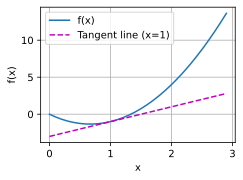

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推广到这些 *多元函数* （multivariate function）上。

设 $y = f(x_1, x_2, \ldots, x_n)$ 是一个具有 $n$ 个变量的函数。$y$ 关于第$i$ 个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算 $\frac{\partial y}{\partial x_i}$，我们可以简单地将 $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ 看作常数，并计算 $y$关于$x_i$ 的导数。对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

## 梯度

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的*梯度*（gradient）向量。设函数 $f: \mathbb{R}^n \rightarrow \mathbb{R}$ 的输入是一个 $n$ 维向量 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中 $\nabla_{\mathbf{x}} f(\mathbf{x})$ 通常在没有歧义时被 $\nabla f(\mathbf{x})$ 取代。

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵 $\mathbf{X}$，我们都有 $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

## 链式法则

然而，上面方法可能很难找到梯度。
这是因为在深度学习中，多元函数通常是 *复合*（composite）的，所以我们可能没法应用上述任何规则来微分这些函数。
幸运的是，链式法则使我们能够微分复合函数。

让我们先考虑单变量函数。假设函数 $y=f(u)$ 和 $u=g(x)$ 都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在让我们把注意力转向一个更一般的场景，即函数具有任意数量的变量的情况。假设可微分函数 $y$ 有变量 $u_1, u_2, \ldots, u_m$，其中每个可微分函数 $u_i$ 都有变量 $x_1, x_2, \ldots, x_n$。注意，$y$是 $x_1, x_2， \ldots, x_n$ 的函数。对于任意 $i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$




# 自动求导

深度学习框架通过自动计算导数，即 *自动求导* （automatic differentiation），来加快这项工作。实际中，根据我们设计的模型，系统会构建一个 *计算图* （computational graph），来跟踪数据通过若干操作组合起来产生输出。自动求导使系统能够随后反向传播梯度。
这里，*反向传播*（backpropagate）只是意味着跟踪整个计算图，填充关于每个参数的偏导数。


## 一个简单的例子

作为一个演示例子，(**假设我们想对函数 $y = 2\mathbf{x}^{\top}\mathbf{x}$关于列向量 $\mathbf{x}$求导**)。首先，我们创建变量 `x` 并为其分配一个初始值。


In [ ]:
import tensorflow as tf

x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

[**在我们计算$y$关于$\mathbf{x}$的梯度之前，我们需要一个地方来存储梯度。**]
重要的是，我们不会在每次对一个参数求导时都分配新的内存。因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。注意，标量函数关于向量$\mathbf{x}$的梯度是向量，并且与$\mathbf{x}$具有相同的形状。


In [ ]:
x = tf.Variable(x)   # x的形状固定了，但是值能改变

(**现在让我们计算 $y$。**)


In [ ]:
# 把所有计算记录在磁带上
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

`x` 是一个长度为 4 的向量，计算 `x` 和 `x` 的内积，得到了我们赋值给 `y` 的标量输出。接下来，我们可以[**通过调用反向传播函数来自动计算`y`关于`x` 每个分量的梯度**]，并打印这些梯度。


In [ ]:
x_grad = t.gradient(y, x)
x_grad

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>

函数 $y = 2\mathbf{x}^{\top}\mathbf{x}$ 关于$\mathbf{x}$ 的梯度应为$4\mathbf{x}$。让我们快速验证我们想要的梯度是否正确计算。


In [ ]:
x_grad == 4 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

[**现在让我们计算 `x` 的另一个函数。**]


In [ ]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
t.gradient(y, x)  # 被新计算的梯度覆盖

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

## 非标量变量的反向传播

当 `y` 不是标量时，向量`y`关于向量`x`的导数的最自然解释是一个矩阵。对于高阶和高维的 `y` 和 `x`，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括[**深度学习中**]），但当我们调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。这里(**，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和。**)


In [ ]:
with tf.GradientTape() as t:
    y = x * x
t.gradient(y, x)  # 等价于 `y = tf.reduce_sum(x * x)`

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 2., 4., 6.], dtype=float32)>

## 分离计算

有时，我们希望[**将某些计算移动到记录的计算图之外**]。
例如，假设`y`是作为`x`的函数计算的，而`z`则是作为`y`和`x`的函数计算的。
现在，想象一下，我们想计算 `z` 关于 `x` 的梯度，但由于某种原因，我们希望将 `y` 视为一个常数，并且只考虑到 `x` 在`y`被计算后发挥的作用。

在这里，我们可以分离 `y` 来返回一个新变量 `u`，该变量与 `y` 具有相同的值，但丢弃计算图中如何计算 `y` 的任何信息。换句话说，梯度不会向后流经 `u` 到 `x`。因此，下面的反向传播函数计算 `z = u * x` 关于 `x` 的偏导数，同时将 `u` 作为常数处理，而不是`z = x * x * x`关于 `x` 的偏导数。


In [ ]:
# 设置 `persistent=True` 来运行 `t.gradient`多次
with tf.GradientTape(persistent=True) as t:
    y = x * x
    u = tf.stop_gradient(y)
    z = u * x

x_grad = t.gradient(z, x)
x_grad == u

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

由于记录了 `y` 的计算结果，我们可以随后在 `y` 上调用反向传播，得到 `y = x * x` 关于的`x`的导数，这里是 `2 * x`。


In [ ]:
t.gradient(y, x) == 2 * x

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>

## Python控制流的梯度计算

使用自动求导的一个好处是，[**即使构建函数的计算图需要通过 Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度**]。在下面的代码中，`while` 循环的迭代次数和 `if` 语句的结果都取决于输入 `a` 的值。


In [ ]:
def f(a):
    b = a * 2
    while tf.norm(b) < 1000:
        b = b * 2
    if tf.reduce_sum(b) > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度。


In [ ]:
a = tf.Variable(tf.random.normal(shape=()))
with tf.GradientTape() as t:
    d = f(a)
d_grad = t.gradient(d, a)
d_grad

<tf.Tensor: shape=(), dtype=float32, numpy=4096.0>

我们现在可以分析上面定义的 `f` 函数。请注意，它在其输入 `a` 中是分段线性的。换言之，对于任何 `a`，存在某个常量标量 `k`，使得 `f(a) = k * a`，其中 `k` 的值取决于输入 `a`。因此，`d / a` 允许我们验证梯度是否正确。


In [ ]:
d_grad == d / a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

# 概率

## 基本概率论

假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。如果骰子是公平的，那么所有六个结果$\{1, \ldots, 6\}$都有相同的可能发生，因此我们将在每六次中看到一个$1$。我们可以说$1$发生的概率为$\frac{1}{6}$。

对于我们从工厂收到的真实骰子，我们可能不知道那些比例，我们需要检查它是否有污染。调查骰子的唯一方法是多次投掷并记录结果。对于每个骰子，我们将观察到 $\{1, \ldots, 6\}$ 中的一个值。给定这些结果，我们想调查每个结果的概率。

对于每个值，一种自然的方法是将单个计数的值除以投掷的总次数。
这给了我们一个给定*事件*的概率的*估计值*。*大数定律*（law of large numbers）告诉我们，随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。在深入了解这里的细节之前，让我们先试一试。

首先，让我们导入必要的软件包。


In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l


接下来，我们将希望能够投掷骰子。在统计学中，我们把从概率分布中抽取样本的过程称为*抽样*（sampling）。
将概率分配给一些离散选择的分布称为*多项分布*（multinomial distribution）。稍后我们将给出*分布*（distribution）的更正式定义。但笼统来说，可以把它看作是对事件的概率分配。

为了抽取一个样本，我们只需传入一个概率向量。
输出是另一个相同长度的向量：它在索引$i$处的值是采样结果对应于$i$的次数。


In [ ]:
fair_probs = tf.ones(6) / 6
tfp.distributions.Multinomial(1, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 0.], dtype=float32)>

如果你运行采样器很多次，你会发现每次你都得到随机的值。在估计一个骰子的公平性时，我们经常希望从同一分布中生成多个样本。如果用Python的for循环来完成这个任务，速度会慢得令人难以忍受，因此我们使用的函数支持同时抽取多个样本，返回我们想要的任意形状的独立样本数组。


In [ ]:
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([1., 2., 3., 2., 1., 1.], dtype=float32)>

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。然后，我们可以统计1000次投掷后, 每个数字被投中了多少次。具体来说，我们计算相对频率作为真实概率的估计。


In [ ]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.165, 0.167, 0.147, 0.191, 0.163, 0.167], dtype=float32)>

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$，大约是$0.167$，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。让我们进行500组实验，每组抽取10个样本。


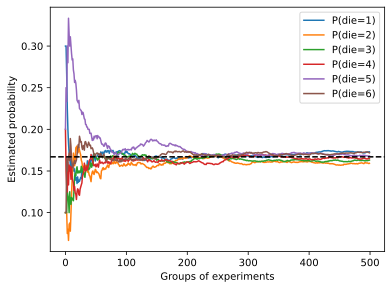

In [ ]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。
当我们通过更多的实验获得更多的数据时，这$6$条实体曲线向真实概率收敛。

### 概率论公理

在处理骰子掷出时，我们将集合 $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ 称为 *样本空间*（sample space） 或 *结果空间*（outcome space），其中每个元素都是 *结果*（outcome）。*事件*（event） 是来自给定样本空间的一组结果。例如，“看到 $5$”（$\{5\}$）和 “看到奇数”（$\{1, 3, 5\}$）都是掷出骰子的有效事件。注意，如果随机实验的结果在事件 $\mathcal{A}$ 中，则事件 $\mathcal{A}$ 已经发生。也就是说，如果投掷出$3$点，因为 $3 \in \{1, 3, 5\}$ ，我们可以说，“看到奇数” 的事件发生了。

形式上，*概率*（probability） 可以被认为是将集合映射到真实值的函数。在给定的样本空间 $\mathcal{S}$ 中，事件$\mathcal{A}$的概率，表示为 $P(\mathcal{A})$，满足以下属性：

* 对于任意事件 $\mathcal{A}$，其概率从不会是负数，即 $P(\mathcal{A}) \geq 0$；
* 整个样本空间的概率为 $1$，即 $P(\mathcal{S}) = 1$；
* 对于任意事件 $\mathcal{A}_1, \mathcal{A}_2, \ldots$ 的可数序列，这些事件*互斥*（mutually exclusive）（对于所有 $i \neq j$ 都有 $\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$），任何事件发生的概率等于它们各自发生的概率之和，即 $P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

这些也是概率论的公理，由科尔莫戈罗夫于 1933 年提出。有了这个公理系统，我们可以避免任何关于随机性的哲学争论；相反，我们可以用数学语言严格地推理。例如，让事件 $\mathcal{A}_1$ 为整个样本空间，且当所有$i > 1$时的$\mathcal{A}_i = \emptyset$，我们可以证明 $P(\emptyset) = 0$，即不可能发生事件的概率是 $0$。

### 随机变量

在我们掷骰子的随机实验中，我们引入了 *随机变量*（random variable） 的概念。随机变量几乎可以是任何数量，并且不是确定性的。它可以在随机实验的一组可能性中取一个值。考虑一个随机变量 $X$，其值在掷骰子的样本空间 $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ 中。我们可以将事件 “看到一个 $5$” 表示为 $\{X = 5\}$ 或 $X = 5$，其概率表示为 $P(\{X = 5\})$ 或 $P(X = 5)$。通过 $P(X = a)$，我们区分了随机变量 $X$ 和 $X$ 可以采取的值（例如 $a$）。然而，这可能会导致繁琐的表示。
为了简化符号，一方面，我们可以将 $P(X)$ 表示为随机变量 $X$ 上的 *分布*（distribution）：分布告诉我们 $X$ 获得任意值的概率。另一方面，我们可以简单用 $P(a)$ 表示随机变量取值 $a$ 的概率。由于概率论中的事件是来自样本空间的一组结果，因此我们可以为随机变量指定值的可取范围。例如，$P(1 \leq X \leq 3)$ 表示事件的概率 $\{1 \leq X \leq 3\}$，这意味着 $\{X = 1, 2, \text{or}, 3\}$。等价地，$P(1 \leq X \leq 3)$ 表示随机变量 $X$ 从 $\{1, 2, 3\}$ 中取值的概率。

请注意，*离散* (discrete) 随机变量（如骰子的侧面）和 *连续* (continuous) 变量（如人的体重和身高）之间存在微妙的区别。问两个人是否具有完全相同的身高没有什么意义。如果我们进行足够精确的测量，你会发现这个星球上没有两个人具有完全相同的身高。事实上，如果我们采取足够精细的测量，在你起床和去睡觉时都不会得到相同的身高。因此，问一个人身高为 1.80139278297192196202 米高的概率是没有任何意义的。考虑到世界上的人口数量，这个概率几乎是 0。在这种情况下，询问某人的身高是否落入给定的区间，比如是否在 1.79 米和 1.81 米之间更有意义。在这些情况下，我们将这个看到某个数值的可能性量化为 *密度* (density)。恰好 1.80 米的高度上没有概率，但密度不是 0。在任何两个不同高度之间的区间，我们都有非零的概率。在本节的其余部分中，我们将考虑离散空间中的概率。对于连续随机变量的概率，您可以参考 :numref:`sec_random_variables`。

## 处理多个随机变量

很多时候，我们会希望一次考虑多个随机变量。比如，我们可能需要对疾病和症状之间的关系进行建模。给定一个疾病和一个症状，比如 “流感” 和 “咳嗽”，会在某个患者身上，以某个概率存在或不存在关系。虽然我们可能希望这两者发生的概率都接近于零，但我们可能需要估计这些概率和它们之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

再举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。在许多情况下，图像会附带一个标签，标识图像中的对象。我们也可以将标签视为一个随机变量。我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。所有这些都是联合发生的随机变量。当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

### 联合概率

第一个被称为 *联合概率* (joint probability) $P(A = a, B=b)$。给定任何值 $a$ 和 $b$, 联合概率可以回答,  $A=a$ 和 $B=b$ 同时满足的概率是多少? 请注意，对于任何值，对于任何 $a$ 和 $b$ 的取值，$P(A = a, B=b) \leq P(A=a)$。这点是确定的，因为要同时发生 $A=a$ 和 $B=b$，$A=a$就必须发生，$B=b$也必须发生（反之亦然）。因此，$A=a$ 和 $B=b$ 同时发生的可能性不大于 $A=a$ 或是 $B=b$ 的可能性。

### 条件概率

这给我们带来了一个有趣的比率：$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。我们称这个比率为 *条件概率* (conditional probability)，并用 $P(B=b \mid A=a)$ 表示它：它是 $B=b$ 的概率，前提是发生了 $A=a$。

### 贝叶斯定理

使用条件概率的定义，我们可以得出统计数据中最有用和最著名的方程之一：*Bayes 定理* (Bayes' theorem)。它如下所示。通过构造，我们有 *乘法规则*， $P(A, B) = P(B \mid A) P(A)$。根据对称性，这也适用于 $P(A, B) = P(A \mid B) P(B)$。假设 $P(B)>0$， 求解其中一个条件变量，我们得到

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

请注意，在这里我们使用更紧凑的表示法，其中 $P(A, B)$ 是一个 *联合分布*，$P(A \mid B)$ 是一个 *条件分布*。这种分布可以在给定值 $A = a, B=b$ 上进行求值。

###  边际化

如果我们想从另一件事中推断一件事，但我们只知道相反方向的属性，比如因和果的时候，Bayes 定理是非常有用的，正如我们将在本节后面看到的那样。为了能进行这项工作，我们需要的一个重要操作是 *边际化*。这项操作是从 $P(A, B)$ 中确定 $P(B)$ 的操作。我们可以看到，$B$ 的概率相当于计算 $A$ 的所有可能选择，并将所有选择的联合概率聚合在一起：

$$P(B) = \sum_{A} P(A, B),$$

这也称为 *求和规则*。边际化结果的概率或分布称为 *边际概率* 或 *边际分布*。

### 独立性

另一个要检查的有用属性是 *依赖* 与 *独立*。两个随机变量 $A$ 和 $B$ 是独立的，意味着事件 $A$ 的发生不会透露有关 $B$ 事件的发生情况的任何信息。在这种情况下，统计学家通常将这一点表述为 $A \perp  B$。根据贝叶斯定理，马上就能同样得到 $P(A \mid B) = P(A)$。在所有其他情况下，我们称 $A$ 和 $B$ 依赖。比如，一个骰子的两次连续抛出是独立的。相比之下，灯开关的位置和房间的亮度并不是（尽管它们不是具有确定性的，因为总是可能存在灯泡坏掉，电源故障，或者开关故障）。

由于 $P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ 等价于 $P(A, B) = P(A)P(B)$，因此两个随机变量是独立的当且仅当两个随机变量的联合分布是其各自分布的乘积。同样地，给定另一个随机变量 $C$时，两个随机变量 $A$ 和 $B$ 是 *条件独立的* ，当且仅当 $P(A, B \mid C) = P(A \mid C)P(B \mid C)$ 。这个情况表示为 $A \perp B \mid C$。

### 应用
:label:`subsec_probability_hiv_app`

让我们用实战考验一下我们的技能。假设一个医生对患者进行艾滋病病毒（HIV）测试。这个测试是相当准确的，如果患者健康但测试显示他患病，这样的失败概率只有 1% 。此外，如果患者真正感染HIV，它永远不会检测不出。我们使用 $D_1$ 来表示诊断结果（如果阳性，则为 $1$，如果阴性，则为 $0$），$H$ 来表示感染艾滋病病毒的状态（如果阳性，则为 $1$，如果阴性，则为0）。
在 :numref:`conditional_prob_D1` 中列出了这样的条件概率。

:条件概率为 $P(D_1 \mid H)$。

| 条件概率 | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |
:label:`conditional_prob_D1`

请注意，每列的加和都是 1（但每行的加和不是），因为条件概率需要总和为1，就像概率一样。让我们计算如果测试出来呈阳性，患者感染HIV的概率，即 $P(H = 1 \mid D_1 = 1)$。显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。假设人口总体是相当健康的，例如，$P(H=1) = 0.0015$。为了应用贝叶斯定理，我们需要运用边际化和乘法规则来确定

$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

因此，我们得到

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

换句话说，尽管使用了非常准确的测试，患者实际上患有艾滋病的几率只有 13.06%。正如我们所看到的，概率可能是违反直觉的。

患者在收到这样可怕的消息后应该怎么办？很可能，患者会要求医生进行另一次测试来了解清楚。第二个测试具有不同的特性，它不如第一个测试那么好，如 :numref:`conditional_prob_D2` 所示。

:条件概率为 $P(D_2 \mid H)$。

| 条件概率 | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |
:label:`conditional_prob_D2`

不幸的是，第二次测试也显示阳性。让我们通过假设条件独立性来计算出应用 Bayes 定理的必要概率：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$

现在我们可以应用边际化和乘法规则：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

最后，鉴于存在两次阳性检测，患者患有艾滋病的概率为

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

也就是说，第二次测试使我们能够对患病的情况获得更高的信心。尽管第二次检验比第一次检验的准确性要低得多，但它仍然显著改善了我们的估计。

## 期望和差异

为了概括概率分布的关键特征，我们需要一些测量方法。随机变量 $X$ 的 *期望*（或平均值）表示为

$$E[X] = \sum_{x} x P(X = x).$$

当函数 $f(x)$ 的输入是从分布 $P$ 中抽取的随机变量时，$f(x)$ 的期望值为

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$

在许多情况下，我们希望衡量随机变量 $X$ 与其期望值的偏置。这可以通过方差来量化

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

它的平方根被称为 *标准差* (standared deviation)。随机变量函数的方差衡量的是，当从该随机变量分布中采样不同值 $x$ 时，函数值偏离该函数的期望的程度：

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$

## 小结

* 我们可以从概率分布中采样。
* 我们可以使用联合分布、条件分布、Bayes 定理、边缘化和独立性假设来分析多个随机变量。
* 期望和方差为概率分布的关键特征的概括提供了实用的度量形式。
